**19EID331P**

**Artificial Neural Networks Lab 4 Report**

**Name : M.Murali Krishna**

**Regd.no:322010404039**

**Section:ECE AIML**

**AIM: To implement feedforward multi-layer networks and apply them to the MINST & CIFAR - 10 datasets.**

**SOFTWARE REQUIRED:** GOOGLE COLAB

**Feedforward Neural Networks**
This Jupyter notebook explains various ways of implementing single-layer and multi-layer neural networks. The
implementations are arranged by concrete (explicit) to abstract order so that one can understand the blackboxed processing in deep learning frameworks.
In order to focus on understanding the internals of training, this notebook uses a simple and classic example:
threshold logic units. Supposing x = 0 as false and x = 1 as true, single-layer neural networks can realize logic
units such as AND ( ∧ ), OR ( ∨ ), NOT (¬), and NAND ( | ). Multi-layer neural networks can realize logical
compounds such as XOR.

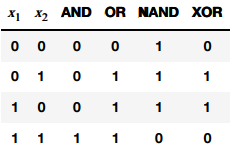


**Using numpy**

**Single-layer perceptron**

In [ ]:
import numpy as np
# Training data for AND.
x = np.array([
[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
y = np.array([0, 0, 0, 1])
w = np.array([0.0, 0.0, 0.0])
eta = 0.5
for t in range(100):
 for i in range(len(y)):
    y_pred = np.heaviside(np.dot(x[i], w), 0)
    w += (y[i] - y_pred) * eta * x[i]


In [ ]:
w


array([ 1. ,  0.5, -1. ])

In [ ]:
np.heaviside(np.dot(x, w), 0)

array([0., 0., 0., 1.])

**Single-layer perceptron with mini-batch**

It is desireable to reduce the execusion run by the Python interpreter, which is relatively slow. The common
technique to speed up a machine-learning code written in Python is to to execute computations within the
matrix library (e.g., numpy).
The single-layer perceptron makes predictions for four inputs,

yˆ
1 = g(x 1
⋅ w)yˆ
2 = g(x 2
⋅ w)yˆ
3 = g(x 3
⋅ w)yˆ
4 = g(x 4
⋅ w)

Here, we define Yˆ ∈ R^(4× 1)
and X ∈ R^(4× d)

In [ ]:
import numpy as np
# Training data for NAND.
x = np.array([
[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
y = np.array([1, 1, 1, 0])
w = np.array([0.0, 0.0, 0.0])
eta = 0.5
for t in range(100):
  y_pred = np.heaviside(np.dot(x, w), 0)
  w += np.dot((y - y_pred), x)


In [ ]:
w

array([-1., -1.,  2.])

In [ ]:
np.heaviside(np.dot(x,w),0)

array([1., 1., 1., 0.])

**Stochastic gradient descent (SGD) with mini-batch**

In [ ]:
import numpy as np
def sigmoid(v):
    return 1.0 / (1 + np.exp(-v))
# Training data for NAND.
x = np.array([
[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]
])
y = np.array([1, 1, 1, 0])
w = np.array([0.0, 0.0, 0.0])
eta = 0.5
for t in range(100):
    y_pred = sigmoid(np.dot(x, w))
    w -= np.dot((y_pred - y), x)

In [ ]:
w

array([-5.59504346, -5.59504346,  8.57206068])

In [ ]:
sigmoid(np.dot(x,w),)

array([0.99981071, 0.95152498, 0.95152498, 0.06798725])

**Automatic differentiation**

**Using Autograd**

In [ ]:
!pip install autograd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import autograd
import autograd.numpy as np
def loss(w, x):
  return -np.log(1.0 / (1 + np.exp(-np.dot(x, w))))
x = np.array([1, 1, 1])
w = np.array([1.0, 1.0, -1.5])
grad_loss = autograd.grad(loss)
print(loss(w, x))
print(grad_loss(w, x))

0.47407698418010663
[-0.37754067 -0.37754067 -0.37754067]


**Using Pytorch**

In [ ]:
!pip install torch torchvision


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
dtype = torch.float
x = torch.tensor([1, 1, 1], dtype=dtype)
w = torch.tensor([1.0, 1.0, -1.5], dtype=dtype, requires_grad=True)
loss = -torch.dot(x, w).sigmoid().log()
loss.backward()
print(loss.item())
print(w.grad)


0.4740769565105438
tensor([-0.3775, -0.3775, -0.3775])


**Implementing neural networks with pytorch**

**Single-layer neural network using automatic differentiation**

In [ ]:
import torch
dtype = torch.float
# Training data for NAND.
x = torch.tensor([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]], dtype=dtype)
y = torch.tensor([[1], [1], [1], [0]], dtype=dtype)
w = torch.randn(3, 1, dtype=dtype, requires_grad=True)
eta = 0.5
for t in range(100):
    # y_pred = \sigma(x \cdot w)
      y_pred = x.mm(w).sigmoid()
      ll = y * y_pred + (1 - y) * (1 - y_pred)
      loss = -ll.log().sum() # The loss value.
      #print(t, loss.item())
      loss.backward() # Compute the gradients of the loss.
      with torch.no_grad():
        
        w -= eta * w.grad # Update weights using SGD.
        w.grad.zero_() # Clear the gradients for the next iteration

In [ ]:
w

tensor([[-4.3889],
        [-4.3925],
        [ 6.7760]], requires_grad=True)

In [ ]:
x.mm(w).sigmoid()


tensor([[0.9989],
        [0.9156],
        [0.9158],
        [0.1186]], grad_fn=<SigmoidBackward0>)

**Multi-layer neural network using automatic differentiation**

In [ ]:
import torch
dtype = torch.float
# Training data for XOR.
x = torch.tensor([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]], dtype=dtype)
y = torch.tensor([[0], [1], [1], [0]], dtype=dtype)
w1 = torch.randn(3, 2, dtype=dtype, requires_grad=True)
w2 = torch.randn(2, 1, dtype=dtype, requires_grad=True)
b2 = torch.randn(1, 1, dtype=dtype, requires_grad=True)
eta = 0.5
for t in range(1000):
    # y_pred = \sigma(w_2 \cdot \sigma(x \cdot w_1) + b_2)
      y_pred = x.mm(w1).sigmoid().mm(w2).add(b2).sigmoid()
      ll = y * y_pred + (1 - y) * (1 - y_pred)
      loss = -ll.log().sum()
      #print(t, loss.item())
      loss.backward()

      with torch.no_grad():
            # Update weights using SGD.
              w1 -= eta * w1.grad
              w2 -= eta * w2.grad
              b2 -= eta * b2.grad
            # Clear the gradients for the next iteration.
              w1.grad.zero_()
              w2.grad.zero_()
              b2.grad.zero_()


In [ ]:
print(w1)
print(w2)
print(b2)

tensor([[ 7.4740, -5.7326],
        [ 7.4811, -5.7336],
        [-3.3949,  8.5880]], requires_grad=True)
tensor([[9.7345],
        [9.8680]], requires_grad=True)
tensor([[-14.4019]], requires_grad=True)


In [ ]:
x.mm(w1).sigmoid().mm(w2).add(b2).sigmoid()

tensor([[0.0145],
        [0.9890],
        [0.9890],
        [0.0156]], grad_fn=<SigmoidBackward0>)

**Single-layer neural network with high-level NN modules**

In [ ]:
import torch

dtype = torch.float

# Training data for NAND.
x = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=dtype)
y = torch.tensor([[1], [1], [1], [0]], dtype=dtype)

# Define a neural network using high-level modules.
model = torch.nn.Sequential(
      torch.nn.Linear(2, 1, bias=True), # 2 dims (with bias) -> 1 dim
)
# Binary corss-entropy loss after sigmoid function.
loss_fn = torch.nn.BCEWithLogitsLoss(size_average=False)
eta = 0.5
for t in range(100):
    y_pred = model(x) # Make predictions.
    loss = loss_fn(y_pred, y) # Compute the loss.
    #print(t, loss.item())
    model.zero_grad() # Zero-clear the gradients.
    loss.backward() # Compute the gradients.
    with torch.no_grad():
          for param in model.parameters():
              param -= eta * param.grad # Update the parameters using SGD.



In [ ]:
model.state_dict()

OrderedDict([('0.weight', tensor([[-4.2393, -4.2397]])),
             ('0.bias', tensor([6.5512]))])

In [ ]:
model(x).sigmoid()


tensor([[0.9986],
        [0.9098],
        [0.9099],
        [0.1270]], grad_fn=<SigmoidBackward0>)

**Multi-layer neural network with high-level NN modules**

In [ ]:
import torch
dtype = torch.float

# Training data for XOR.
x = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=dtype)
y = torch.tensor([[0], [1], [1], [0]], dtype=dtype)

# Define a neural network using high-level modules.
model = torch.nn.Sequential(
    torch.nn.Linear(2, 2, bias=True), # 2 dims (with bias) -> 2 dims
    torch.nn.Sigmoid(), # Sigmoid function
    torch.nn.Linear(2, 1, bias=True), # 2 dims (with bias) -> 1 dim
    )

# Binary corss-entropy loss after sigmoid function.
loss_fn = torch.nn.BCEWithLogitsLoss(size_average=False)

eta = 0.5
for t in range(1000):
    y_pred = model(x) # Make predictions.
    loss = loss_fn(y_pred, y) # Compute the loss.
    #print(t, loss.item())

    model.zero_grad() # Zero-clear the gradients.
    loss.backward() # Compute the gradients.
    
    with torch.no_grad():
        for param in model.parameters():
            param -= eta * param.grad # Update the parameters using SGD.

In [ ]:
model.state_dict()

OrderedDict([('0.weight', tensor([[-8.4675,  4.1071],
                      [-8.4889, -4.8882]])),
             ('0.bias', tensor([-2.6147,  1.4000])),
             ('2.weight', tensor([[ 7.0061, -7.5702]])),
             ('2.bias', tensor([0.0006]))])

In [ ]:
model(x).sigmoid()


tensor([[0.0037],
        [0.9959],
        [0.4986],
        [0.5018]], grad_fn=<SigmoidBackward0>)

**Single-layer neural network with an optimizer**

In [ ]:
import torch

dtype = torch.float

# Training data for NAND.
x = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=dtype)
y = torch.tensor([[1], [1], [1], [0]], dtype=dtype)

# Define a neural network using high-level modules.
model = torch.nn.Sequential(
    torch.nn.Linear(2, 1, bias=True), # 2 dims (with bias) -> 1 dim
)

# Binary corss-entropy loss after sigmoid function.
loss_fn = torch.nn.BCEWithLogitsLoss(size_average=False)

# Optimizer based on SGD (change "SGD" to "Adam" to use Adam)
optimizer = torch.optim.SGD(model.parameters(), lr=0.5)

for t in range(100):
    y_pred = model(x) # Make predictions.
    loss = loss_fn(y_pred, y) # Compute the loss.
    #print(t, loss.item())
    optimizer.zero_grad() # Zero-clear gradients.
    loss.backward() # Compute the gradients.
    optimizer.step() # Update the parameters using the gradients.

In [ ]:
model.state_dict()


OrderedDict([('0.weight', tensor([[-4.2215, -4.2215]])),
             ('0.bias', tensor([6.5244]))])

In [ ]:
model(x).sigmoid()

tensor([[0.9985],
        [0.9091],
        [0.9091],
        [0.1280]], grad_fn=<SigmoidBackward0>)

**Multi-layer neural networks using an optimizer**

In [ ]:
import torch
dtype = torch.float

# Training data for XOR.
x = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=dtype)
y = torch.tensor([[0], [1], [1], [0]], dtype=dtype)

# Define a neural network using high-level modules.
model = torch.nn.Sequential(
    torch.nn.Linear(2, 2, bias=True), # 2 dims (with bias) -> 2 dims
    torch.nn.Sigmoid(), # Sigmoid function
    torch.nn.Linear(2, 1, bias=True), # 2 dims (with bias) -> 1 dim
)

# Binary corss-entropy loss after sigmoid function.
loss_fn = torch.nn.BCEWithLogitsLoss(size_average=False)

# Optimizer based on SGD (change "SGD" to "Adam" to use Adam)
optimizer = torch.optim.SGD(model.parameters(), lr=0.5)

for t in range(1000):
    y_pred = model(x) # Make predictions.
    loss = loss_fn(y_pred, y) # Compute the loss.
    #print(t, loss.item())
    optimizer.zero_grad() # Zero-clear gradients.
    loss.backward() # Compute the gradients.
    optimizer.step() # Update the parameters using the gradients.

In [ ]:
model.state_dict()

OrderedDict([('0.weight', tensor([[ 5.7355, -5.9902],
                      [ 6.9613, -6.7321]])),
             ('0.bias', tensor([-3.0621,  3.3902])),
             ('2.weight', tensor([[ 10.7569, -10.0656]])),
             ('2.bias', tensor([4.6617]))])

In [ ]:
model(x).sigmoid()

tensor([[0.0100],
        [0.9869],
        [0.9906],
        [0.0085]], grad_fn=<SigmoidBackward0>)

**Single-layer neural network with a customizable NN class.**

In [ ]:
import torch
dtype = torch.float

# Training data for NAND.
x = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=dtype)
y = torch.tensor([[1], [1], [1], [0]], dtype=dtype)

# Define a neural network model.
class SingleLayerNN(torch.nn.Module):
    def __init__(self, d_in, d_out):
        super(SingleLayerNN, self).__init__()
        self.linear1 = torch.nn.Linear(d_in, d_out, bias=True)
    def forward(self, x):
        return self.linear1(x)

model = SingleLayerNN(2, 1)

# Binary corss-entropy loss after sigmoid function.
loss_fn = torch.nn.BCEWithLogitsLoss(size_average=False)

# Optimizer based on SGD (change "SGD" to "Adam" to use Adam)
optimizer = torch.optim.SGD(model.parameters(), lr=0.5)

for t in range(100):
    y_pred = model(x) # Make predictions.
    loss = loss_fn(y_pred, y) # Compute the loss.
    #print(t, loss.item())

    optimizer.zero_grad() # Zero-clear gradients.
    loss.backward() # Compute the gradients.
    optimizer.step() # Update the parameters using the gradients.

In [ ]:
model.state_dict()

OrderedDict([('linear1.weight', tensor([[-4.2471, -4.2477]])),
             ('linear1.bias', tensor([6.5629]))])

In [ ]:
model(x).sigmoid()


tensor([[0.9987],
        [0.9114],
        [0.9114],
        [0.1248]], grad_fn=<SigmoidBackward0>)

**Multi-layer neural network with a customizable NN class.**

In [ ]:
import torch

dtype = torch.float

# Training data for XOR.
x = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=dtype)
y = torch.tensor([[0], [1], [1], [0]], dtype=dtype)

# Define a neural network model.
class ThreeLayerNN(torch.nn.Module):
    def __init__(self, d_in, d_hidden, d_out):
        super(ThreeLayerNN, self).__init__()
        self.linear1 = torch.nn.Linear(d_in, d_hidden, bias=True)
        self.linear2 = torch.nn.Linear(d_hidden, d_out, bias=True)
    def forward(self, x):
        return self.linear2(self.linear1(x).sigmoid())
model = ThreeLayerNN(2, 2, 1)

oss_fn = torch.nn.BCEWithLogitsLoss(size_average=False)

# Optimizer based on SGD (change "SGD" to "Adam" to use Adam)
optimizer = torch.optim.SGD(model.parameters(), lr=0.5)

for t in range(1000):
    y_pred = model(x) # Make predictions.
    loss = loss_fn(y_pred, y) # Compute the loss.
    #print(t, loss.item())
    optimizer.zero_grad() # Zero-clear gradients.
    loss.backward() # Compute the gradients.
    optimizer.step()# Update the parameters using the gradients.


In [ ]:
model.state_dict()

OrderedDict([('linear1.weight', tensor([[ 5.3270,  5.3234],
                      [-6.9823, -6.9592]])),
             ('linear1.bias', tensor([-8.2499,  2.8390])),
             ('linear2.weight', tensor([[-11.8538, -11.6513]])),
             ('linear2.bias', tensor([5.7664]))])

In [ ]:
model(x).sigmoid()

tensor([[0.0053],
        [0.9932],
        [0.9932],
        [0.0060]], grad_fn=<SigmoidBackward0>)

**from the link - "https://pyimagesearch.com/2021/05/06/implementing-feedforward-neural-networks-with-keras-and-tensorflow/#download-the-code"**

**MINST**

In [ ]:
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
import argparse

In [ ]:
# construct the argument parse and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-o", "--output", required=True,
	help="path to the output loss/accuracy plot")
args = vars(ap.parse_args())

usage: ipykernel_launcher.py [-h] -o OUTPUT
ipykernel_launcher.py: error: the following arguments are required: -o/--output


SystemExit: ignored

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3334: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
# grab the MNIST dataset (if this is your first time using this
# dataset then the 11MB download may take a minute)
print("[INFO] accessing MNIST...")
((trainX, trainY), (testX, testY)) = mnist.load_data()
# each image in the MNIST dataset is represented as a 28x28x1
# image, but in order to apply a standard neural network we must
# first "flatten" the image to be simple list of 28x28=784 pixels
trainX = trainX.reshape((trainX.shape[0], 28 * 28 * 1))
testX = testX.reshape((testX.shape[0], 28 * 28 * 1))
# scale data to the range of [0, 1]
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

[INFO] accessing MNIST...


In [ ]:
# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [ ]:
# define the 784-256-128-10 architecture using Keras
model = Sequential()
model.add(Dense(256, input_shape=(784,), activation="sigmoid"))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

In [ ]:
# train the model using SGD
print("[INFO] training network...")
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY),
	epochs=100, batch_size=128)

[INFO] training network...
Epoch 1/100
469/469 [==============================] - 3s 7ms/step - loss: 2.2718 - accuracy: 0.2020 - val_loss: 2.2382 - val_accuracy: 0.3197
Epoch 2/100
469/469 [==============================] - 3s 6ms/step - loss: 2.2035 - accuracy: 0.4103 - val_loss: 2.1616 - val_accuracy: 0.5251
Epoch 3/100
469/469 [==============================] - 3s 6ms/step - loss: 2.1163 - accuracy: 0.5360 - val_loss: 2.0553 - val_accuracy: 0.6066
Epoch 4/100
469/469 [==============================] - 3s 6ms/step - loss: 1.9900 - accuracy: 0.5999 - val_loss: 1.9019 - val_accuracy: 0.6387
Epoch 5/100
469/469 [==============================] - 3s 6ms/step - loss: 1.8129 - accuracy: 0.6387 - val_loss: 1.6966 - val_accuracy: 0.6485
Epoch 6/100
469/469 [==============================] - 3s 6ms/step - loss: 1.5971 - accuracy: 0.6719 - val_loss: 1.4698 - val_accuracy: 0.6958
Epoch 7/100
469/469 [==============================] - 3s 7ms/step - loss: 1.3805 - accuracy: 0.7076 - val_loss: 1.

In [ ]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1),
	target_names=[str(x) for x in lb.classes_]))

[INFO] evaluating network...
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.97      0.97      0.97      1135
           2       0.92      0.90      0.91      1032
           3       0.90      0.92      0.91      1010
           4       0.91      0.94      0.93       982
           5       0.91      0.86      0.88       892
           6       0.94      0.94      0.94       958
           7       0.92      0.92      0.92      1028
           8       0.90      0.88      0.89       974
           9       0.91      0.90      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



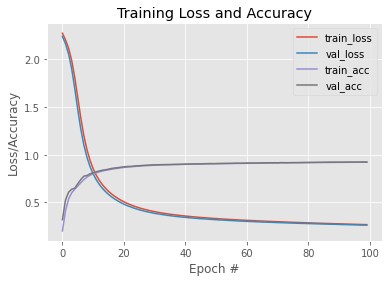

In [ ]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

**CIFAR - 10**

In [ ]:
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
import argparse

In [ ]:
# construct the argument parse and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-o", "--output", required=True,
	help="path to the output loss/accuracy plot")
args = vars(ap.parse_args())

usage: ipykernel_launcher.py [-h] -o OUTPUT
ipykernel_launcher.py: error: the following arguments are required: -o/--output


SystemExit: ignored

In [ ]:
# load the training and testing data, scale it into the range [0, 1],
# then reshape the design matrix
print("[INFO] loading CIFAR-10 data...")
((trainX, trainY), (testX, testY)) = cifar10.load_data()
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0
trainX = trainX.reshape((trainX.shape[0], 3072))
testX = testX.reshape((testX.shape[0], 3072))

[INFO] loading CIFAR-10 data...
170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)
# initialize the label names for the CIFAR-10 dataset
labelNames = ["airplane", "automobile", "bird", "cat", "deer",
	"dog", "frog", "horse", "ship", "truck"]

In [ ]:
# define the 3072-1024-512-10 architecture using Keras
model = Sequential()
model.add(Dense(1024, input_shape=(3072,), activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [ ]:
# train the model using SGD
print("[INFO] training network...")
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY),
	epochs=100, batch_size=32)

[INFO] training network...
Epoch 1/100
1563/1563 [==============================] - 37s 24ms/step - loss: 1.8393 - accuracy: 0.3447 - val_loss: 1.7403 - val_accuracy: 0.3665
Epoch 2/100
1563/1563 [==============================] - 38s 24ms/step - loss: 1.6482 - accuracy: 0.4182 - val_loss: 1.6052 - val_accuracy: 0.4369
Epoch 3/100
1563/1563 [==============================] - 38s 24ms/step - loss: 1.5713 - accuracy: 0.4447 - val_loss: 1.6516 - val_accuracy: 0.3921
Epoch 4/100
1563/1563 [==============================] - 41s 26ms/step - loss: 1.5113 - accuracy: 0.4663 - val_loss: 1.5198 - val_accuracy: 0.4605
Epoch 5/100
1563/1563 [==============================] - 39s 25ms/step - loss: 1.4652 - accuracy: 0.4847 - val_loss: 1.4806 - val_accuracy: 0.4719
Epoch 6/100
1563/1563 [==============================] - 38s 24ms/step - loss: 1.4210 - accuracy: 0.4982 - val_loss: 1.6222 - val_accuracy: 0.4468
Epoch 7/100
1563/1563 [==============================] - 38s 24ms/step - loss: 1.3896 - acc

In [ ]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=labelNames))

[INFO] evaluating network...
              precision    recall  f1-score   support

    airplane       0.66      0.62      0.64      1000
  automobile       0.70      0.66      0.68      1000
        bird       0.44      0.41      0.42      1000
         cat       0.37      0.44      0.40      1000
        deer       0.46      0.53      0.49      1000
         dog       0.46      0.44      0.45      1000
        frog       0.62      0.59      0.61      1000
       horse       0.65      0.60      0.62      1000
        ship       0.66      0.72      0.69      1000
       truck       0.64      0.61      0.62      1000

    accuracy                           0.56     10000
   macro avg       0.57      0.56      0.56     10000
weighted avg       0.57      0.56      0.56     10000



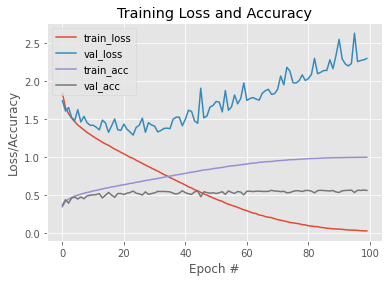

In [ ]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()


**CONCLUSION:**

1.Accuracy for Dataset : MINST - 92.31%

2.Accuracy for Dataset : CIFAR - 56.03%

**RESULT:**

Hence,we implemented feedforward multilayer networks & applied them to the MINST & CIFAR -10 datasets.